In [ ]:
 #Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [ ]:
# Read the uploaded CSV file
df = pd.read_csv("/content/Dataset .csv")

In [ ]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)              True   
1                          Japanese  ...  Botswana Pula(P)              True   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)              True   
3                   Japanese, Sushi  ...  Botswana Pula(P)             False   
4                  Japanese, Korean  ...  Botswana Pula(P)              True   

   Has Online delivery  Is delivering now  Switch to order menu Price range  \
0                False              False                    No           3   
1                False              False                    No           3   
2                False              False                    No           4   
3                False              False                    No           4   
4                False              False                    No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   bool   
 13  Has Online delivery   9551 non-null   bool   
 14  Is delivering now     9551 non-null   bool   
 15  Switch to order menu 

**LEVEL 1**

Task 1 Top Cuisines

 Q1. Top three Most Common cuisines

In [ ]:
top_cuisines = df['Cuisines'].value_counts().head(3)
print("Top 3 Cuisines:")
print(top_cuisines)

Top 3 Cuisines:
Cuisines
North Indian             945
North Indian, Chinese    511
Fast Food                354
Name: count, dtype: int64


In [ ]:
total_restaurants = len(df)
top_cuisines_percent = (top_cuisines / total_restaurants) * 100
print("\nPercentage of Restaurants serving Top Cuisines:")
print(top_cuisines_percent.round(2))


Percentage of Restaurants serving Top Cuisines:
Cuisines
North Indian             9.89
North Indian, Chinese    5.35
Fast Food                3.71
Name: count, dtype: float64


<ipython-input-7-959602937>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines_percent.values, y=top_cuisines_percent.index, palette="viridis")


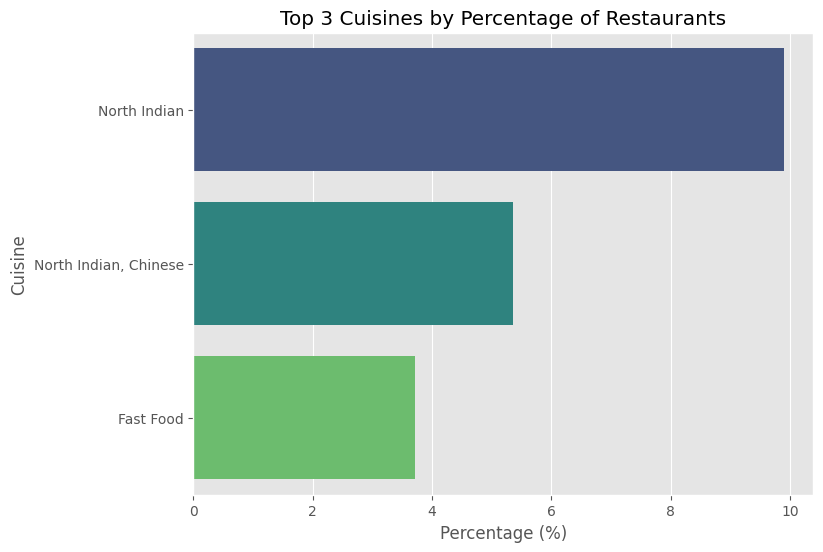

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_cuisines_percent.values, y=top_cuisines_percent.index, palette="viridis")
plt.title("Top 3 Cuisines by Percentage of Restaurants")
plt.xlabel("Percentage (%)")
plt.ylabel("Cuisine")
plt.show()

Q2. Calculate the percentage of restaurants that serve each of the top
 cuisines


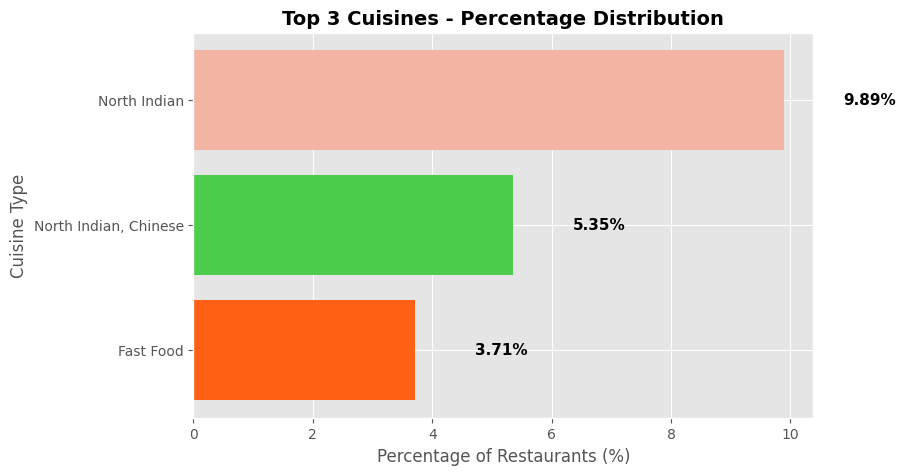

In [ ]:
# Step 1: Calculate Percentage
total_restaurants = len(df)
top_cuisines = df['Cuisines'].value_counts().head(3).reset_index()
top_cuisines.columns = ['Cuisine', 'Restaurant Count']
top_cuisines['Percentage'] = (top_cuisines['Restaurant Count'] / total_restaurants * 100).round(2)

# Step 2: Horizontal Bar Chart for Percentage
plt.figure(figsize=(8, 5))
colors = ['#f4b4a4', '#4ECC4D', '#FF6016']

plt.barh(top_cuisines['Cuisine'], top_cuisines['Percentage'], color=colors)
plt.xlabel("Percentage of Restaurants (%)", fontsize=12)
plt.ylabel("Cuisine Type", fontsize=12)
plt.title("Top 3 Cuisines - Percentage Distribution", fontsize=14, fontweight='bold')

# Add percentage values on bars
for i, val in enumerate(top_cuisines['Percentage']):
    plt.text(val + 1, i, f"{val}%", va='center', fontsize=11, fontweight='bold')

plt.gca().invert_yaxis()
plt.show()


Task 2 City Analysis

Q1: Identify the city with the highest number of restaurants

In [ ]:
# Find the city with the highest number of restaurants
city_counts = df['City'].value_counts()
top_city = city_counts.index[0]  # City with highest number of restaurants
top_city_count = city_counts.max()  # Number of restaurants in that city

# Print the result
print(f"The city with the most restaurants is: {top_city} ({top_city_count} restaurants)")
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean().round(2).head()




The city with the most restaurants is: New Delhi (5473 restaurants)


In [ ]:
# Display the result
city_avg_ratings


City
Abu Dhabi    4.30
Agra         3.96
Ahmedabad    4.16
Albany       3.56
Allahabad    3.40
Name: Aggregate rating, dtype: float64

 Q2: Determine the city with the highest average rating

In [ ]:
top_rated_city = city_avg_ratings.idxmax()
top_avg_rating = city_avg_ratings.max()

print(f"The city with the highest average rating is {top_rated_city} ({top_avg_rating} average rating).")

The city with the highest average rating is Abu Dhabi (4.3 average rating).


Task 3: Price Range Distribution

 Q1. Create a histogram or bar chart tovisualize the distribution of price ranges among the restaurants

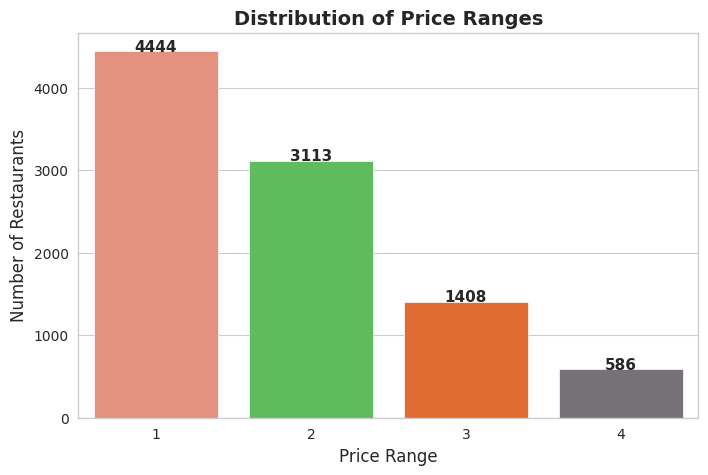

In [ ]:
# Step 1: Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()


sns.set_style("whitegrid")

colors = ['#f6866f', '#4ECC4D', '#FF6016', '#777077']

plt.figure(figsize=(8, 5))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, hue=price_range_counts.index, palette=colors, legend=False)

plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.title("Distribution of Price Ranges", fontsize=14, fontweight='bold')

for i, val in enumerate(price_range_counts.values):
    plt.text(i, val + 1, str(val), ha='center', fontsize=11, fontweight='bold')

plt.show()


 Q2.Calculate the percentage of restaurants in each price range

In [ ]:
# Step 1: Calculate the percentage of restaurants in each price range
total_restaurants = len(df)
price_range = df['Price range'].value_counts().sort_index()
price_range_percentages = (price_range / total_restaurants * 100).round(2)



In [ ]:
print("Percentage of Restaurants in Each Price Range:\n")
for price, percent in price_range_percentages.items():
    print(f"Price Range {price}: {percent}%")


Percentage of Restaurants in Each Price Range:

Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


<ipython-input-23-2296260217>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_percentages.index, y=price_range_percentages.values, palette=colors)


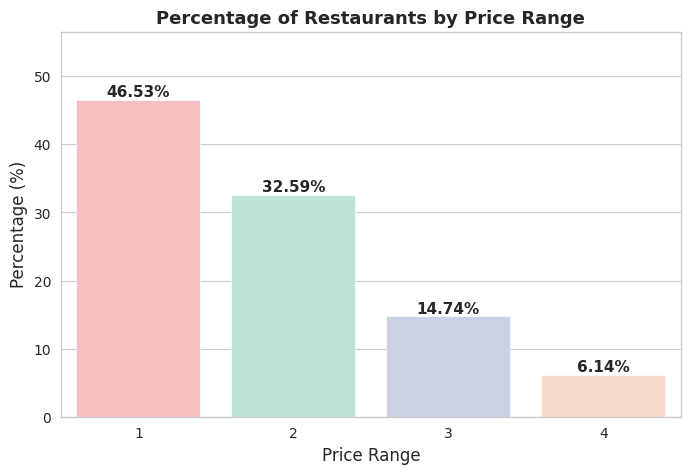

In [ ]:
# Define updated pastel color theme
colors = ['#FFB6B9', '#B5EAD7', '#C7CEEA', '#FFDAC1']  # Soft pink, mint, lavender, peach
plt.figure(figsize=(8, 5))
sns.barplot(x=price_range_percentages.index, y=price_range_percentages.values, palette=colors)
plt.title("Percentage of Restaurants by Price Range", fontsize=13, fontweight='bold')
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
for i, val in enumerate(price_range_percentages.values):
    plt.text(i, val + 0.5, f"{val}%", ha='center', fontsize=11, fontweight='bold')

plt.ylim(0, max(price_range_percentages.values) + 10)
plt.show()



Task 4. Online Delivery

Q1: Percentage of Restaurants Offering Online Delivery

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# Ensure the column is treated as string before using .str.lower()
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.lower()

# Step 1: Calculate percentage of restaurants offering online delivery
total_restaurants = len(df)
online_delivery_count = (df['Has Online delivery'] == 'yes').sum()
online_delivery_percent = (online_delivery_count / total_restaurants) * 100

# Print result
print(f"✔️ Percentage of restaurants offering online delivery: {online_delivery_percent:.2f}%")



✔️ Percentage of restaurants offering online delivery: 0.00%


Q2. Compare the average ratings of restaurants with and without online delivery

In [ ]:
# Step 1: Compare average ratings (assuming 'Aggregate rating' column exists)
if 'Aggregate rating' in df.columns:
    avg_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
    avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

    print(f"Average rating of restaurants with online delivery: {avg_rating_with_delivery:.2f}")
    print(f"Average rating of restaurants without online delivery: {avg_rating_without_delivery:.2f}")
else:
    print("Column 'Aggregate rating' not found in dataset")



Average rating of restaurants with online delivery: nan
Average rating of restaurants without online delivery: nan


**LEVEL 3**

 Task1: Restaurant Reviews

 Q1.Analyze the text reviews to identify the most common positive and negative keywords

In [ ]:
df['Rating text'].unique()



array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

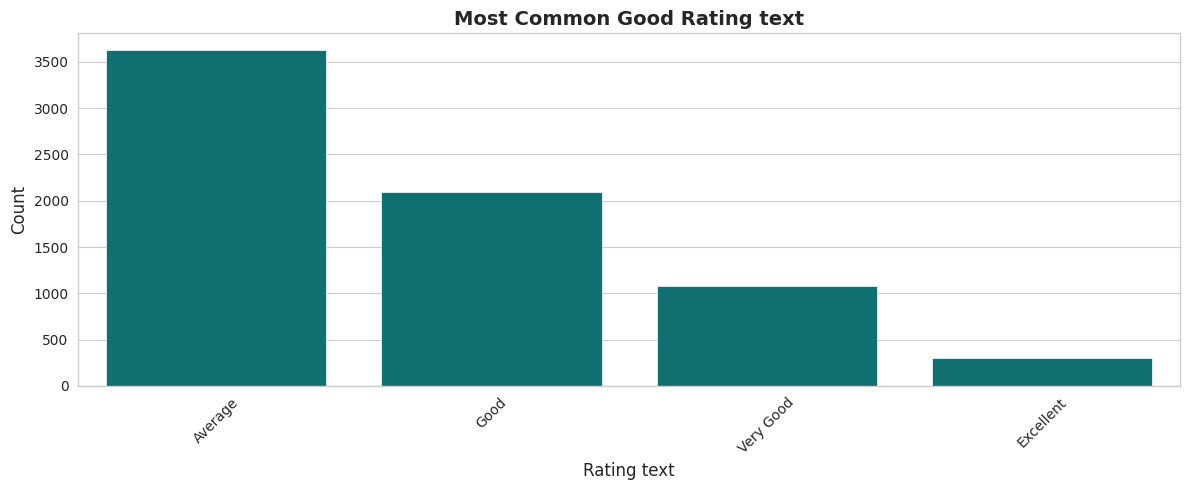

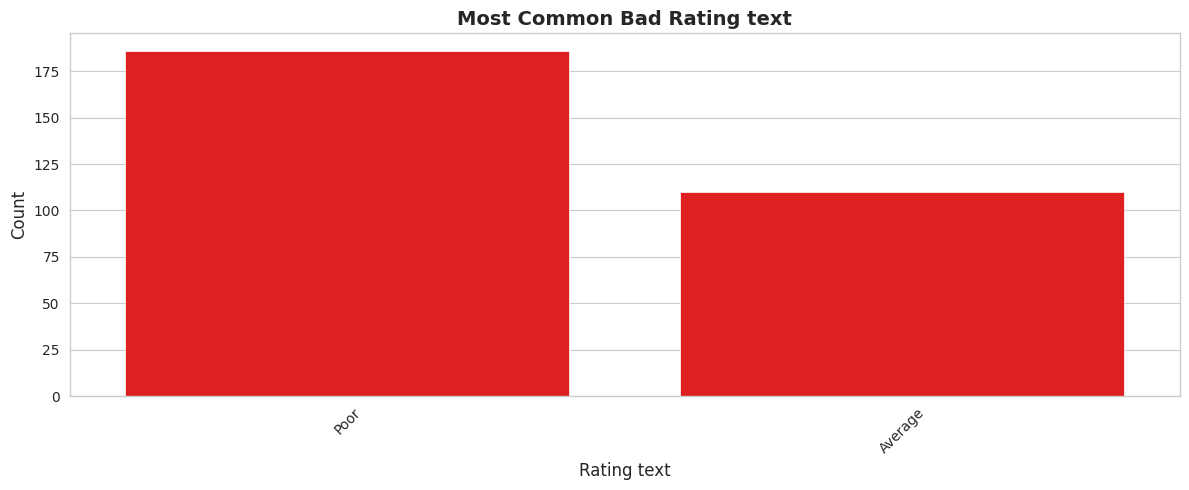

In [ ]:
from collections import Counter

# Step 1: Filter out empty reviews
df_filtered = df[df['Rating text'] != "Not rated"]

# Step 2: Filter Reviews Based on "Aggregate rating"
bad_reviews = df_filtered[df_filtered['Aggregate rating'] <= 2.5]['Rating text']
good_reviews = df_filtered[df_filtered['Aggregate rating'] >= 2.6]['Rating text']

# Step 3: Count the Frequency of Reviews
bad_counts = Counter(bad_reviews)
good_counts = Counter(good_reviews)

# Step 4: Convert to DataFrames for Plotting
bad_df = pd.DataFrame(bad_counts.items(), columns=['Rating text', 'Count']).sort_values(by='Count', ascending=False).head(10)
good_df = pd.DataFrame(good_counts.items(), columns=['Rating text', 'Count']).sort_values(by='Count', ascending=False).head(10)

# Step 5: Plot Bar Charts
def plot_bar_chart(df, title, color):
    plt.figure(figsize=(12, 5))
    sns.barplot(data=df, x='Rating text', y='Count', color=color)
    plt.xlabel('Rating text', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Most Common Good & Bad Reviews
plot_bar_chart(good_df, "Most Common Good Rating text", color='teal')
plot_bar_chart(bad_df, "Most Common Bad Rating text", color='red')


Q2.Calculate the average length of reviews andexplore if there is a  relationship between review length and rating.

The average review length is 7.02 characters.


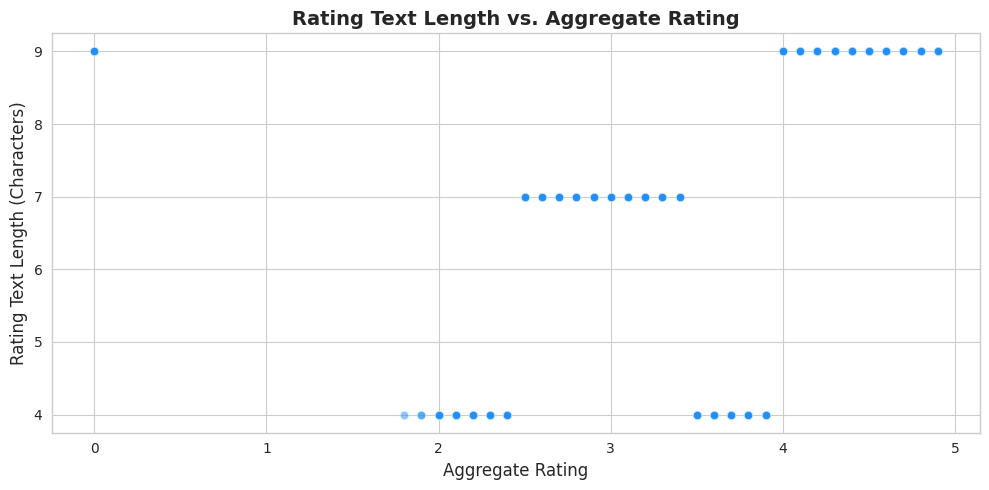

In [ ]:
# Step 1: Remove missing rating texts
df_filtered = df[df['Rating text'].notna()].copy()

# Step 2: Calculate Rating Text Length (Character Count)
df_filtered['Review_Length'] = df_filtered['Rating text'].apply(lambda x: len(x.strip()))

# Step 3: Calculate Average Rating Text Length
average_review_length = round(df_filtered['Review_Length'].mean(), 2)
print(f"The average review length is {average_review_length} characters.")

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered, x='Aggregate rating', y='Review_Length', alpha=0.5, color='dodgerblue')
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Rating Text Length (Characters)', fontsize=12)
plt.title('Rating Text Length vs. Aggregate Rating', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



Task 2  Votes Analysis

Q1. Identify the restaurants with the highest and lowest number of votes

In [ ]:
# Aggregate votes by restaurant
restaurant_votes = df.groupby('Restaurant Name', as_index=False)['Votes'].sum()

# Find the restaurant with the highest and lowest votes
most_voted_restaurant = restaurant_votes.loc[restaurant_votes['Votes'].idxmax()]
least_voted_restaurant = restaurant_votes.loc[restaurant_votes['Votes'].idxmin()]

# Print the results
print(f"🍽️ The restaurant with the highest votes is {most_voted_restaurant['Restaurant Name']} with {most_voted_restaurant['Votes']} votes.")
print(f"🍽️ The restaurant with the lowest votes is {least_voted_restaurant['Restaurant Name']} with {least_voted_restaurant['Votes']} votes.")


🍽️ The restaurant with the highest votes is Barbeque Nation with 28142 votes.
🍽️ The restaurant with the lowest votes is #hashtag with 0 votes.


Q2. Analyze if there is a correlation between number of votes and rating of a restaurant

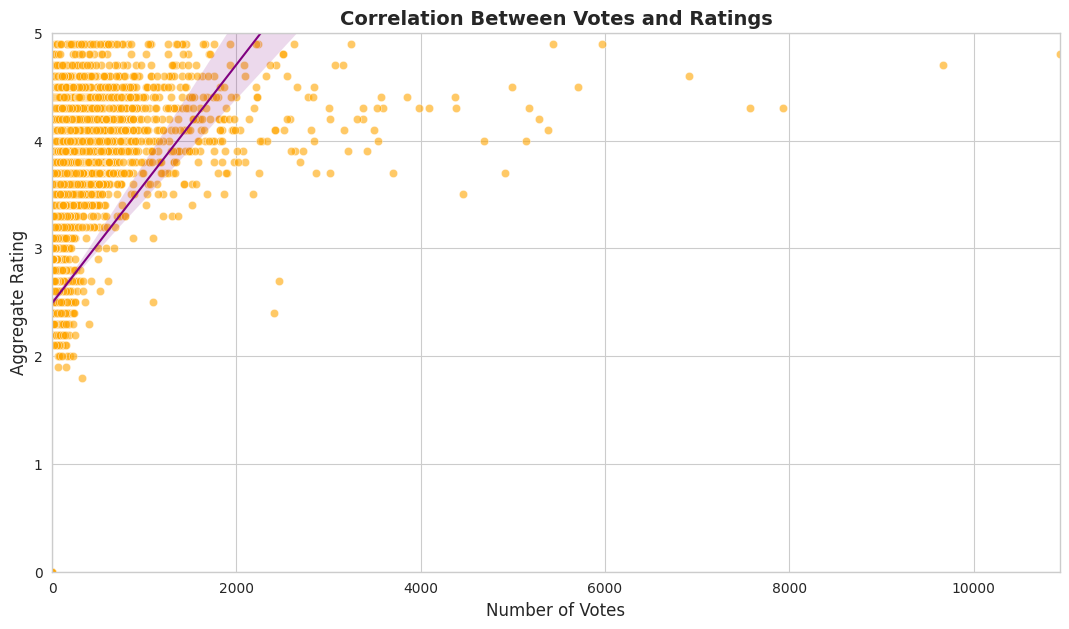

In [ ]:
plt.figure(figsize=(13, 7))

# 🌟 Scatter plot with Votes on X-axis and Ratings on Y-axis
sns.scatterplot(x=df['Votes'], y=df['Aggregate rating'], alpha=0.6, color='orange')

# 📈 Regression trend line
sns.regplot(x=df['Votes'], y=df['Aggregate rating'], scatter=False, color='purple', line_kws={'linewidth': 1.5})

# 🎯 Adjust axis limits for clarity
plt.xlim(0, df['Votes'].max())
plt.ylim(0, 5)

# 🏷️ Add axis labels and title
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.title('Correlation Between Votes and Ratings', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()


Task 3. Price Range vs. Online Delivery and Table Booking

 Q1.Analyze if there is a relationship between the price range and the availability of online delivery and table booking

In [ ]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

['No' 'Yes']
['Yes' 'No']
             Online Delivery (%)  Table Booking (%)
Price range                                        
1                      15.774077           0.022502
2                      41.310633           7.677482
3                      29.190341          45.738636
4                       9.044369          46.757679


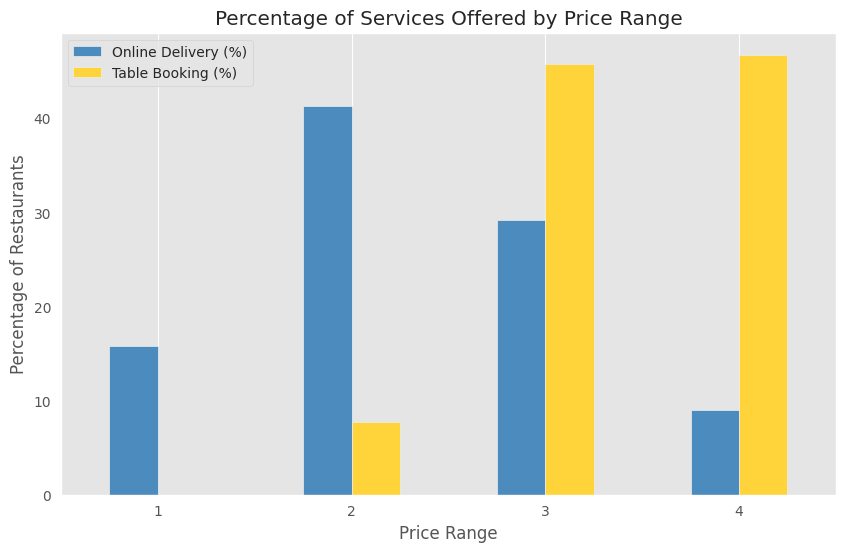

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/Dataset .csv')

# Let's check unique values first to verify column data
print(df['Has Online delivery'].unique())
print(df['Has Table booking'].unique())

# Convert columns to uniform format (if necessary)
# assuming values are 'Yes'/'No'
df['Has Online delivery'] = df['Has Online delivery'].str.strip()
df['Has Table booking'] = df['Has Table booking'].str.strip()

# Group by Price Range and calculate percentages for Online Delivery
online_delivery_percentage = df.groupby('Price range')['Has Online delivery'].apply(lambda x: (x == 'Yes').mean() * 100)

# Group by Price Range and calculate percentages for Table Booking
table_booking_percentage = df.groupby('Price range')['Has Table booking'].apply(lambda x: (x == 'Yes').mean() * 100)

# Display percentages
result_df = pd.DataFrame({
    'Online Delivery (%)': online_delivery_percentage,
    'Table Booking (%)': table_booking_percentage
})
print(result_df)

# Plotting both together
result_df.plot(kind='bar', figsize=(10, 6), color=['#4B8BBE', '#FFD43B'])
plt.title('Percentage of Services Offered by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper left')
plt.show()


In [ ]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


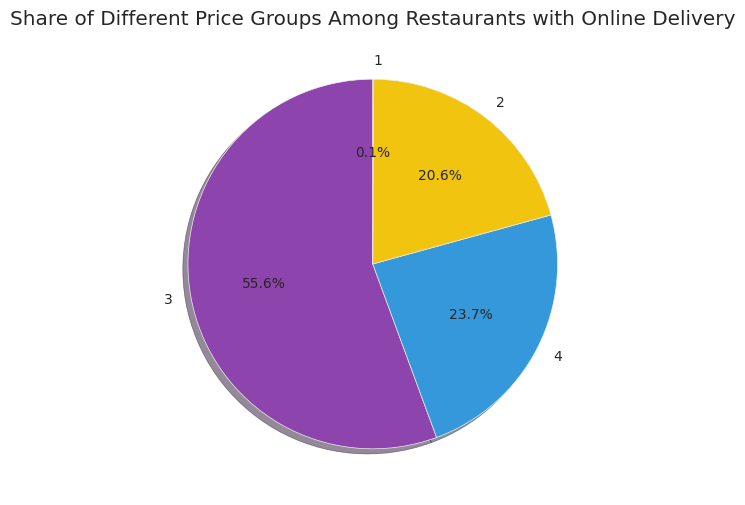

In [ ]:
# Filter only restaurants that have table booking
table_booking_df = df[df['Has Table booking'] == 1]

# Count the number of restaurants in each price range
price_group_counts_table = table_booking_df['Price range'].value_counts()

# Convert counts to percentages
price_group_percentage_table = (price_group_counts_table / price_group_counts_table.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    price_group_percentage_table,
    labels=price_group_percentage_table.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8E44AD', '#3498DB', '#F1C40F', '#E74C3C'],  # New color palette (purple-blue-yellow-red)
    shadow=True
)

# Add title
plt.title('Share of Different Price Groups Among Restaurants with Online Delivery')

# Display the chart
plt.show()



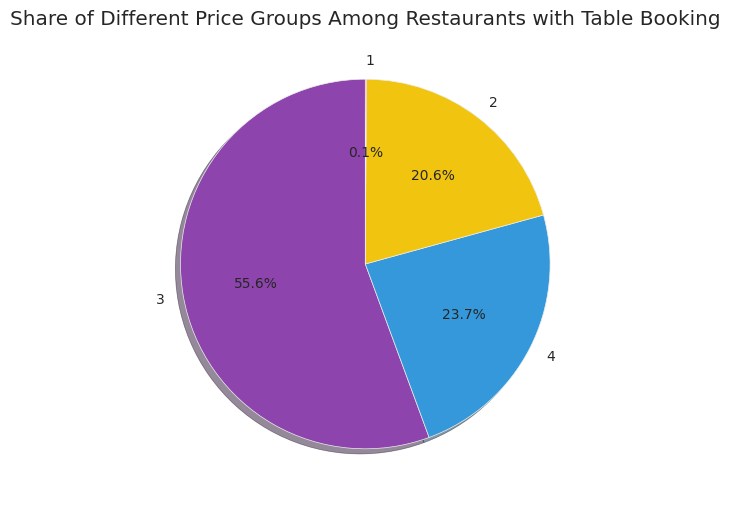

In [ ]:
# Filter only restaurants that have table booking
table_booking_df = df[df['Has Table booking'] == 1]

# Count the number of restaurants in each price range
price_group_counts_table = table_booking_df['Price range'].value_counts()

# Convert counts to percentages
price_group_percentage_table = (price_group_counts_table / price_group_counts_table.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    price_group_percentage_table,
    labels=price_group_percentage_table.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#8E44AD', '#3498DB', '#F1C40F', '#E74C3C'],  # New color palette (purple-blue-yellow-red)
    shadow=True
)

# Add title
plt.title('Share of Different Price Groups Among Restaurants with Table Booking')

# Display the chart
plt.show()
